In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open('/content/drive/MyDrive/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
# block_size = 10
X, Y = [], []

for w in words[:]:
  print(w)
  # Creo una lista de tres elementos de 0
  context = [0] * block_size
  # print("Context es: ", context)

  # Antes de entrar al for concateno con '.' para que termine word en ese caracter
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '---->', itos[ix])
    # Finalizando desplazo para los 2 últimos caracter y agrego el siguiente
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

Se han truncado las últimas 5000 líneas del flujo de salida.
doron
dovi
draysen
dredyn
dugan
durell
ebin
edwardo
efrem
ehaan
ehab
eirik
eldar
eliav
eligio
eloi
eluzer
elway
emaad
emeka
enki
ero
erron
esaiah
estiven
eulalio
everet
everly
evert
evian
eyas
ezer
ezren
faaris
facundo
famous
farzan
felton
field
filipe
finbar
finch
flynt
fordham
fouad
gabryel
garnet
gaurik
gavi
geovonni
germany
gerrard
gevorg
giuliani
graden
gradyn
grayer
grayton
greylen
grimm
gurshaan
hameed
hanzel
hasib
haylen
henning
herminio
hill
hiyan
hrihaan
huxson
hykeem
ihsaan
imer
imir
iremide
isahi
isaih
ishak
ishank
issachar
issam
issiah
iyaan
izai
izick
jabbar
jabri
jaccob
jadarrius
jadin
jaecion
jaelin
jaelon
jaevon
jah
jahcere
jahmeer
jahvon
jahzir
jaidin
jaishawn
jakaree
jakorey
jalan
jameis
jansiel
janthony
janziel
jarom
jaseer
jaston
jatavion
jathniel
javarius
jawuan
jaxel
jaxxyn
jaxzon
jayace
jaydien
jayke
jaymere
jayniel
jayonni
jayston
jayziah
jazen
jazion
jeramie
jeramyah
jerek
jeremey
jeren
jeric
jerman


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [ ]:
C = torch.randn((27,2))

In [ ]:
C

tensor([[ 0.7178,  1.3223],
        [-0.0301, -1.7060],
        [-0.9916, -0.5459],
        [-0.7830,  1.7614],
        [ 2.0252, -0.2457],
        [ 0.2681, -0.9517],
        [-0.1830, -0.0921],
        [-0.7167, -0.1658],
        [-0.6267,  0.2958],
        [ 0.7361, -0.2741],
        [ 0.8532, -2.3973],
        [-0.6706,  0.6678],
        [ 2.5627,  1.8692],
        [-0.6697,  0.5739],
        [ 1.5414, -0.1092],
        [-0.7230, -2.2178],
        [-0.8391,  1.0701],
        [-0.2735,  1.9039],
        [ 0.6223, -1.9311],
        [-0.4903,  0.3398],
        [ 0.9778,  3.0950],
        [-0.1916, -0.5836],
        [-1.6413, -0.1839],
        [ 0.9146,  0.4413],
        [ 1.2798,  0.6091],
        [-0.5028,  0.6725],
        [ 1.9158,  0.1682]])

In [ ]:
C[5]

tensor([ 0.2681, -0.9517])

In [ ]:
torch.tensor(5)

tensor(5)

In [ ]:
F.one_hot(torch.tensor(5), num_classes= 27).shape

torch.Size([27])

In [ ]:
# No puedo hacer el producto punto por diferencia de tipos
# F.one_hot(torch.tensor(5), num_classes= 27) @ C

In [ ]:
F.one_hot(torch.tensor(5), num_classes = 27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [ ]:
F.one_hot(torch.tensor(5), num_classes= 27).float() @ C

tensor([ 0.2681, -0.9517])

In [ ]:
C[torch.tensor([5,6,7,7,7,7,7,7]), 0]

tensor([ 0.2681, -0.1830, -0.7167, -0.7167, -0.7167, -0.7167, -0.7167, -0.7167])

In [ ]:
C[X][:,0,:]

tensor([[ 0.7178,  1.3223],
        [ 0.7178,  1.3223],
        [ 0.7178,  1.3223],
        ...,
        [ 1.9158,  0.1682],
        [ 1.9158,  0.1682],
        [-0.5028,  0.6725]])

In [ ]:
C[X]

tensor([[[ 0.7178,  1.3223],
         [ 0.7178,  1.3223],
         [ 0.7178,  1.3223]],

        [[ 0.7178,  1.3223],
         [ 0.7178,  1.3223],
         [ 0.2681, -0.9517]],

        [[ 0.7178,  1.3223],
         [ 0.2681, -0.9517],
         [-0.6697,  0.5739]],

        ...,

        [[ 1.9158,  0.1682],
         [ 1.9158,  0.1682],
         [-0.5028,  0.6725]],

        [[ 1.9158,  0.1682],
         [-0.5028,  0.6725],
         [ 1.9158,  0.1682]],

        [[-0.5028,  0.6725],
         [ 1.9158,  0.1682],
         [ 1.2798,  0.6091]]])

In [ ]:
C[X].shape

torch.Size([228146, 3, 2])

In [ ]:
X[13, 2]

tensor(1)

In [ ]:
C[X][13,2]

tensor([-0.0301, -1.7060])

In [ ]:
C[1]

tensor([-0.0301, -1.7060])

In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
emb[:,0,:].shape

torch.Size([228146, 2])

In [ ]:
# Con torch.cat concatenamos la lista de los embebidos, es decir
# ponemos las columnas continuamente. También podiamos usar torch.unbind
# nos divide en tuplas la dimension que queramos
# o también view, como si fuera un reshape
# El problema es que la concatenacion es ineficiente porque crea otro tensor

emb = torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1)


In [ ]:
# emb.view(32,6) == torch.cat(torch.unbind(emb, 1), 1)

In [ ]:
#torch.unbind(emb,1)
#torch.cat(torch.unbind(emb,1),1)

In [ ]:
emb

tensor([[ 0.7178,  1.3223,  0.7178,  1.3223,  0.7178,  1.3223],
        [ 0.7178,  1.3223,  0.7178,  1.3223,  0.2681, -0.9517],
        [ 0.7178,  1.3223,  0.2681, -0.9517, -0.6697,  0.5739],
        ...,
        [ 1.9158,  0.1682,  1.9158,  0.1682, -0.5028,  0.6725],
        [ 1.9158,  0.1682, -0.5028,  0.6725,  1.9158,  0.1682],
        [-0.5028,  0.6725,  1.9158,  0.1682,  1.2798,  0.6091]])

In [ ]:
W1 = torch.randn(6,100)
b1 = torch.randn(100)

In [ ]:
emb.shape

torch.Size([228146, 6])

In [ ]:
# b1 es un vector de 100 elementos
# W1 6,100
# W1 6,100
# b1   100
# El broadcasting agrega una dimensión a b1 (1,100) y luego la va
# a crear una copia para cada fila y la suma
h = emb @ W1 + b1

In [ ]:
h.shape

torch.Size([228146, 100])

In [ ]:
# Los tensores de pytorch tiene un metodo llamado view que es muy eficiente
a = torch.arange(18)

In [ ]:
a.view((3,3,2))

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
# Con storage vemos como esta representado los numeros en memoria
# como un vector de una dimension
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
h = torch.tanh(h)

In [ ]:
h

tensor([[ 1.0000,  0.9781,  0.8404,  ...,  0.9999,  0.6345,  0.9942],
        [ 1.0000,  0.9986,  0.9983,  ...,  0.9773,  0.7749,  0.8985],
        [ 0.2178, -0.0020,  0.7421,  ..., -0.0572, -0.9997,  0.9940],
        ...,
        [ 0.9791, -0.9005,  0.9983,  ...,  0.9974, -0.7716,  0.9009],
        [ 1.0000,  1.0000,  0.9958,  ...,  1.0000,  0.3514,  0.9302],
        [ 1.0000,  1.0000, -0.5710,  ..., -0.5060,  1.0000, -0.9112]])

In [ ]:
h.shape

torch.Size([228146, 100])

In [ ]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([228146, 27])

In [ ]:
counts = logits.exp()

In [ ]:
counts.shape

torch.Size([228146, 27])

In [ ]:
counts.sum(1, keepdims = True).shape

torch.Size([228146, 1])

In [ ]:
prob = counts / counts.sum(1, keepdims = True)

In [ ]:
prob[0].sum()

tensor(1.0000)

In [ ]:
prob[torch.arange(X.shape[0]), Y]

tensor([5.4503e-04, 5.4014e-01, 5.7503e-13,  ..., 1.2253e-02, 6.0125e-08,
        2.6417e-05])

In [ ]:
loss = -prob[torch.arange(X.shape[0]), Y].log().mean()

In [ ]:
loss

tensor(15.5930)

In [ ]:
# ----------------------- now made respectable :) ------------------------------

In [ ]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn((27), generator = g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of paramaters in total

3481

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
# Una forma de probar cualquier es el mejor learning rate es probando
# muchos de ellos y compararlo con la pérdida
lre = torch.linspace(-3,0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
lri = []
lossi = []
for i in range(60000):

  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ix]] # (32 , 3 , 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2 # (32,27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())
  # Backward pass
  for p in parameters:
    p.grad = None

  loss.backward()
  lr = 0.001
  #Update
  for p in parameters:
    p.data += -lr * p.grad

  # track stat
  # lri.append(lre[i])
  # lossi.append(loss.item())


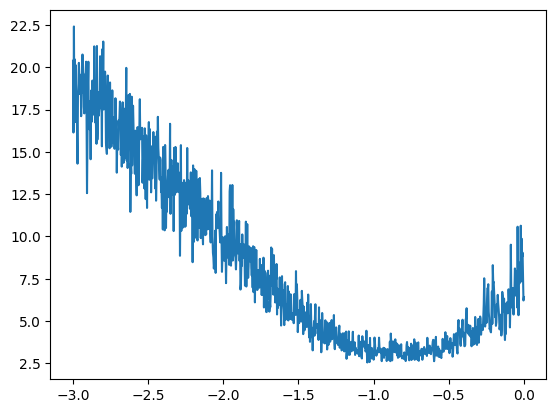

In [ ]:
plt.plot(lri, lossi)

In [ ]:
emb = C[X] # (32 , 3 , 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2 # (32,27)
# counts = logits.exp()
# prob = counts / counts.sum(1,keepdims=True)
# loss = -prob[torch.arange(32), Y].log().mean()
# Con cross_entropy obtenemos las probabilidades y la función de pérdida
# F.cross_entropy es mas eficiente y más simple al hacer el cálculo, por tanto es lo recomendado
# El forward y el backward son mas eficiente y también por el buen comportamiento que tiene
# numericamente
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3005, grad_fn=<NllLossBackward0>)

In [ ]:
Y.shape

torch.Size([228146])

In [ ]:
#F.cross_entropy(logits, Y)

In [ ]:
torch.tensor([[1,2,3], [4,5,6]]).nelement()

6

In [ ]:
logits.max(1)

torch.return_types.max(
values=tensor([2.6063, 2.6063, 2.7399, 2.6063, 2.7301, 2.2336, 2.6063, 2.6063, 2.5783,
        3.2774, 2.5441, 2.4551, 2.4991, 2.5025, 3.2500, 3.0631, 2.1882, 2.1619,
        2.7763, 2.8465, 2.6063, 2.2026, 2.5743, 2.2541, 1.7693, 2.4464, 3.9451,
        3.0568, 2.6063, 3.4009, 2.7253, 2.6435], grad_fn=<MaxBackward0>),
indices=tensor([ 1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0, 14,  0,  0,  0,  1,  0,
         0,  0,  1,  9,  1,  1, 18,  5,  1,  0,  1,  1,  0,  9]))

In [ ]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [ ]:
torch.randint(0,X.shape[0], (32,))

tensor([173851, 172234,  45276,  35087,  30860, 137693, 132642,  42100, 114168,
         16351,  40059,  24232,  16202, 113387, 146027,  13113, 173654,  51000,
        101460,   8447, 191683,  92738, 183625, 187282,  88096, 196669,  54778,
         25890,  99928,  68924, 189080,  88660])

In [ ]:
# Si la funcion de perdida es muy pequeña es porque puede ser que la red esta
# haciendo overfiting, entonces al probar otros conjuntos de datos la misma
# puede dar numeros elevados. Y cuando haga la inferencia solo arroje la misma
# información con la que fue entrenada.
# Entonces se suele dividir los datos en 3 partes
# training split, validation or dev split y test split
# 80%, 10%, 10% para cada uno en este caso
# El conjunto de datos de validacion es para probar los hyperparámetros
# como lo puede ser el tama;o de las neuronas de las capas, o la dimension
# de los embebido, la fuerza de la regulizarición

In [ ]:
# build the dataset

def build_dataset(words):
  block_size = 3 # context length: how many characters do we take to predict the next one?
  # block_size = 10
  X, Y = [], []

  for w in words:
    #print(w)
    # Creo una lista de tres elementos de 0
    context = [0] * block_size
    # print("Context es: ", context)

    # Antes de entrar al for concateno con '.' para que termine word en ese caracter
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', itos[ix])
      # Finalizando desplazo para los 2 últimos caracter y agrego el siguiente
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Xte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
len(words)

32033

In [ ]:
n1

25626

In [ ]:
n2

28829

In [ ]:
# Cantidad para validacion o desarrollo(dev)
n2 - n1

3203

In [ ]:
# Cantidad de datos para test
len(words) - n2

3204

In [ ]:
# ---------------------------- now made respectable :) ----------------------------------

In [ ]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200,27), generator = g)
b2 = torch.randn((27), generator = g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # Forward pass
  emb = C[Xtr[ix]] # (32 , 3 , 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2 # (32,27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())
  # Backward pass
  for p in parameters:
    p.grad = None

  stepi.append(i)
  lossi.append(loss.log10().item())
  loss.backward()
  lr = 0.01
  #Update
  for p in parameters:
    p.data += -lr * p.grad

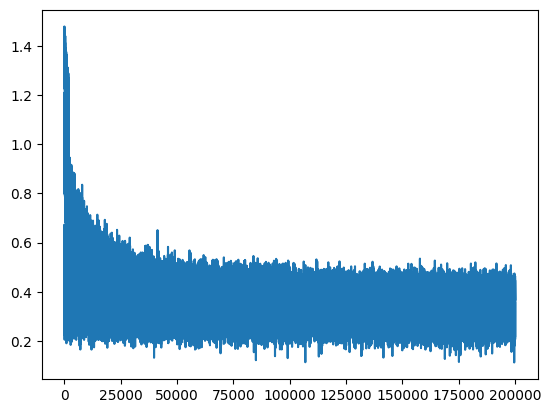

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
print(loss.item())

2.197167158126831


In [ ]:
emb = C[Xtr] # (32 , 3 , 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0670, grad_fn=<NllLossBackward0>)

La red neuronal esta haciendo underfitting porque la funcion de perdida de dev y tr son casi iguales. Se puede arreglar aumentando la red neuronal

In [ ]:
emb = C[Xdev] # (32 , 3 , 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1204, grad_fn=<NllLossBackward0>)

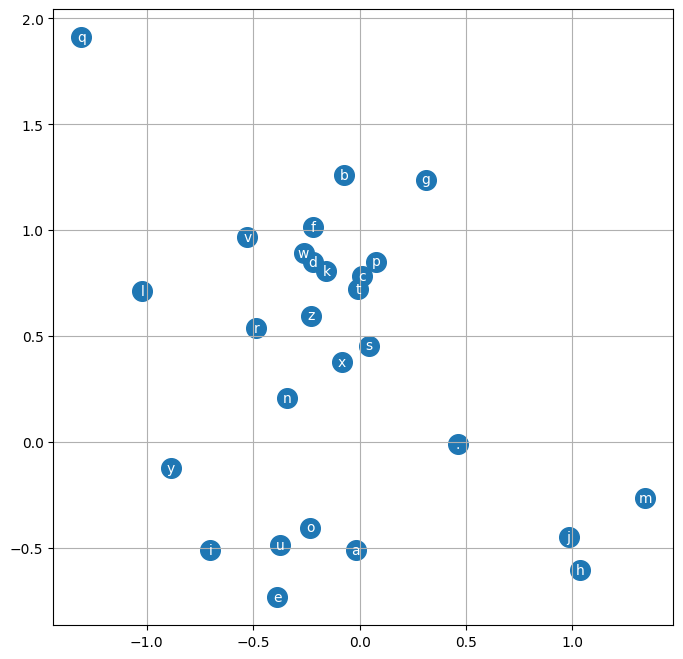

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha = "center", va = "center", color = "white")
plt.grid('minor')

In [ ]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # Forward pass
  emb = C[Xtr[ix]] # (32 , 3 , 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2 # (32,27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())
  # Backward pass
  for p in parameters:
    p.grad = None

  stepi.append(i)
  lossi.append(loss.log10().item())
  loss.backward()
  lr = 0.1 if i < 100000 else 0.01
  #Update
  for p in parameters:
    p.data += -lr * p.grad

In [ ]:
# sample from  the model
g = torch.Generator().manual_seed(2147483647+10)

for _ in range(20):

  out = []
  context = [0] * block_size # initialize with all ...

  while True:
    emb = C[torch.tensor([context])] # (1, block_size, d)

    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs =  F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print("Probabilidades",probs.shape)
  #print("Emb",emb.shape)
  print(''.join(itos[i] for i in out))

Probabilidades torch.Size([1, 27])
mona.
Probabilidades torch.Size([1, 27])
mayah.
Probabilidades torch.Size([1, 27])
seel.
Probabilidades torch.Size([1, 27])
nihahala.
Probabilidades torch.Size([1, 27])
emmanieng.
Probabilidades torch.Size([1, 27])
leg.
Probabilidades torch.Size([1, 27])
azeendrelin.
Probabilidades torch.Size([1, 27])
shi.
Probabilidades torch.Size([1, 27])
jen.
Probabilidades torch.Size([1, 27])
edennedianar.
Probabilidades torch.Size([1, 27])
kayzion.
Probabilidades torch.Size([1, 27])
kalin.
Probabilidades torch.Size([1, 27])
shubergahimael.
Probabilidades torch.Size([1, 27])
kin.
Probabilidades torch.Size([1, 27])
rendy.
Probabilidades torch.Size([1, 27])
panthona.
Probabilidades torch.Size([1, 27])
ubrence.
Probabilidades torch.Size([1, 27])
rhylene.
Probabilidades torch.Size([1, 27])
els.
Probabilidades torch.Size([1, 27])
kayshayne.
